<a href="https://colab.research.google.com/github/Aashi2608/Machine-Learning/blob/main/ML_PROJECT_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE** **LEARNING** **PROJECT**

# WINE QUALITY PREDICTION


*   **MODEL USED**

*   RANDOM FOREST
*   SVM ( Support Vector Machine )


*   KNN ( K-Nearest Neighbour )







**1. USING RANDOM FOREST MODEL ON THE DATASET**

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [ ]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


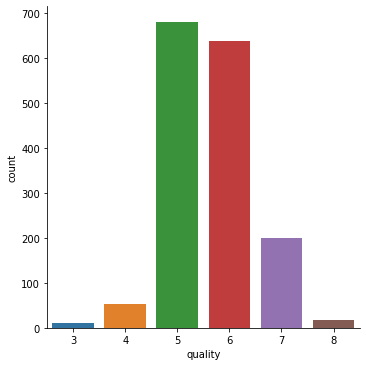

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

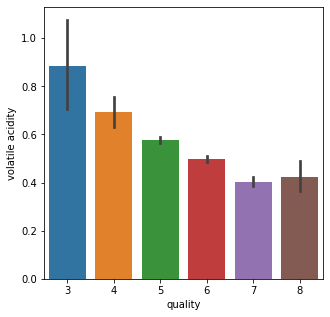

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

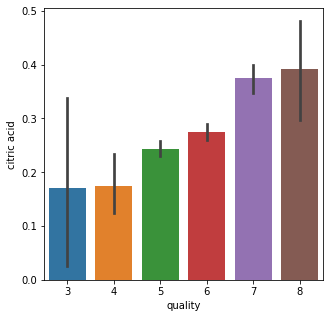

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = wine_dataset.corr()

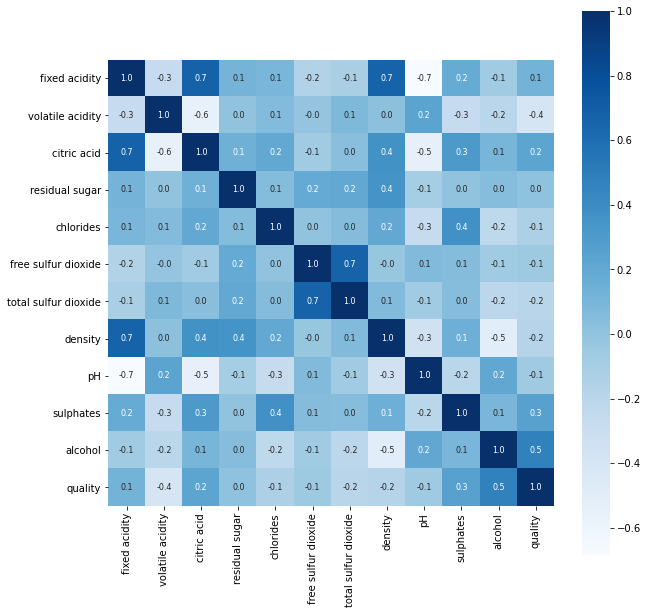

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data Preprocessing

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label Binarizaton

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


Building a Predictive System

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


**2. USING SVM MODEL ON THE SAME DATASET**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset from Kaggle (assuming you have downloaded it)
wine_data = pd.read_csv("/content/winequality-red.csv")  # Replace with your filename

In [ ]:
# Separate features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)  # All columns except 'quality'
y = wine_data["quality"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create the SVR model
svc_model = SVR(kernel='rbf', C=1.0)  # You can adjust 'C' for regularization

In [ ]:
# Train the model
svc_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

In [ ]:
# Evaluate model performance (e.g., using mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.351374134523052


In [ ]:
# You can further explore hyperparameter tuning using GridSearchCV:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svc_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'C': 1, 'kernel': 'rbf'}


In [ ]:
# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (GridSearchCV):", mse)

Mean Squared Error (GridSearchCV): 0.351374134523052


In [ ]:
# ... (rest of the code remains the same) ...

def calculate_accuracy(y_true, y_pred, threshold=0.5):
  """Calculates accuracy for regression considering predictions within a threshold."""
  correct_predictions = (abs(y_true - y_pred) <= threshold).sum()
  total_predictions = len(y_true)
  accuracy = correct_predictions / total_predictions
  return accuracy * 100  # Convert to percentage

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Calculate accuracy with a threshold of 0.5 (you can adjust this)
accuracy = calculate_accuracy(y_test, y_pred, threshold=0.5)
print("Accuracy (custom function, threshold=0.5):", accuracy, "%")

# You can further explore hyperparameter tuning using GridSearchCV:
# ... (rest of the code remains the same) ...

Accuracy (custom function, threshold=0.5): 60.3125 %


**3. USING KNN MODEL ON THE SAME DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/winequality-red.csv")

In [ ]:
x= dataset.drop(['quality'], axis= 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y= dataset['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
x= scaler.fit_transform(x)

In [ ]:
x

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(x,y, test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors =1)

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
ypred=knn.predict(xtest)
ypred

array([5, 4, 7, 6, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6,
       5, 6, 6, 7, 7, 5, 5, 7, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 7, 5, 5, 5, 5, 6,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 4, 5, 7, 5, 5, 6, 5, 6, 5, 7,
       5, 6, 5, 7, 6, 6, 7, 5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       7, 5, 7, 6, 6, 7, 5, 5, 5, 5, 5, 8, 6, 6, 6, 5, 6, 5, 7, 5, 6, 5,
       6, 6, 5, 7, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6,
       6, 7, 7, 6, 5, 6, 8, 5, 5, 5, 6, 7, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 3, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 4, 5, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 4, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6,
       7, 6, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 5, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 5, 7, 4, 5, 6, 6, 5, 5, 6, 6, 6, 5, 4, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 5, 5, 5,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[  0   0   1   1   0   0]
 [  3   0  10   7   1   0]
 [  0   2 153  45   7   0]
 [  0   6  50 114  25   0]
 [  0   1   9  12  28   2]
 [  0   0   0   0   2   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.69      0.74      0.71       207
           6       0.64      0.58      0.61       195
           7       0.44      0.54      0.49        52
           8       0.33      0.33      0.33         3

    accuracy                           0.62       480
   macro avg       0.35      0.37      0.36       480
weighted avg       0.60      0.62      0.61       480



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error rate')

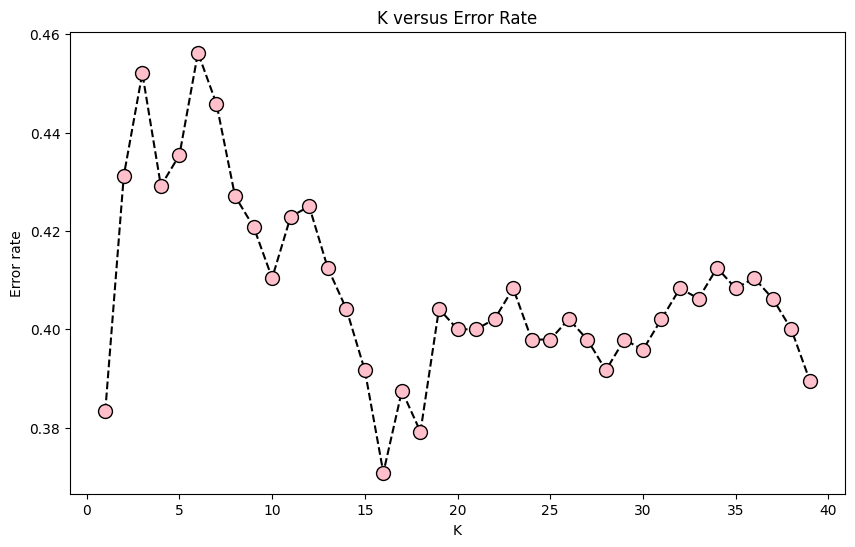

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black',linestyle='--',markersize=10,markerfacecolor='pink',marker='o')
plt.title('K versus Error Rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.6166666666666667
